<h1> Análisis de Rentabilidad, Retención de Clientes y Optimización de Estrategias de Marketing <h1>

###### Elaborado: Braulio herrera González. Data Analyst / Business Management

###### (Gráficos color negro adaptado al dashboard principal)

## **Tabla de contenido**

#### 1. Configuración del entorno
- Instalación de librerías
- Importación de las librerías necesarias
- Carga y presentación de los datos
- Visualización de las dimensiones del dataset
- Visualización de todas las columnas del Dataset

#### 2. Limpieza y preparación de los datos
- Verificación de valores nulos
- Verificación de campos vacíos
- Ajuste del ROI (convertir decimales a porcentaje)

#### 3.1 Análisis exploratorio de los datos (EDA)
- Análisis de campañas y rendimiento financiero
- Campañas con mayores tasas de retorno
- Campañas con peores tasas de retorno
- Visualización de las campañas que sobrepasaron el presupuesto y las fechas
- Ganancias por canal de marketing

#### 3.2 Análisis de comportamiento y ubicación:
- Comportamiento Online por ubicación 
- Canal de marketing con más interacciones
- Tipo de contenido con más interacciones 
- Encuestas por ubicación y puntuación de satisfacción promedio
- Eficacia del tipo de contenido 
- Desempeño del competidor por ubicación 
- Lista de comentarios de mejoras provenientes de las entrevistas

#### 3.3 Análisis de ingresos y segmentación:
- Resumen general de las campañas (ROI, presupuesto, costo, ingreso, ganancia/pérdida)
- Ingresos por segmento de edad 
- Comportamiento Online por segmentos de edad 
- Ingresos generados por ubicación 
- Impacto de la participación en el programa de lealtad
- Evolución temporal de registros, clics y compras

#### 3.4 Análisis de correlaciones y patrones:
- Correlación entre variables clave (Interacción total, ROI, Compras, CLV)
- Grupos de clientes con patrones similares (dispersión)

#### 4. Modelos predictivos y machine learning

#### 4.1 Modelos de regresión:
- **Modelo de regresión lineal**
- Modelo de regresión lineal (con transformación logarítmica del ROI)
- Validación cruzada para regresión lineal
- **Modelo de regresión polinómica**
- Pipeline con regresión polinómica + regularización Ridge + validación cruzada
- Gráficos de residuos
- Prueba de normalidad de los residuos
- Cálculo del VIF para analizar multicolinealidad
#### 4.2 Modelos avanzados:
- **Modelo Random Forest**
- **Modelo XGBoost**
#### 4.3 Predicciones con el modelo de regresión polinómica con regularización Ridge

#### 5. Conclusiones
- Resumen de hallazgos clave: **Campañas - Modelos**

#### 6. Recomendaciones
- Recomendaciones: **campañas - Modelos**



# Descripción del proyecto.

En un entorno empresarial cada vez más competitivo, comprender los factores que impulsan la rentabilidad y la eficacia de las campañas de marketing es esencial para la toma de decisiones estratégicas. Este proyecto tiene como objetivo analizar múltiples dimensiones de los datos de marketing y comportamiento del cliente para identificar oportunidades de mejora y optimización.

A través de técnicas de análisis exploratorio, visualización de datos y modelos de machine learning, se busca:

- Evaluar el desempeño de las campañas: Identificar las campañas con mayor y menor retorno de inversión (ROI) para optimizar la asignación del presupuesto y reducir las pérdidas.

- Segmentar clientes y analizar patrones de comportamiento: Descubrir grupos de clientes según su interacción online, valor del ciclo de vida (CLV) y participación en programas de lealtad, para personalizar las estrategias de marketing.

- Analizar la efectividad de los canales de marketing y tipos de contenido: Determinar cuáles generan más interacciones, ingresos y satisfacción del cliente, facilitando la optimización de los recursos y esfuerzos creativos.

- Predecir métricas clave con modelos avanzados: Implementar modelos predictivos optimizados para anticipar resultados, detectar riesgos de sobreajuste y ajustar las estrategias futuras con base en datos sólidos.

Este análisis integral permitirá no solo comprender el panorama actual de las estrategias de marketing, sino también generar recomendaciones accionables para maximizar la rentabilidad, fortalecer la lealtad de los clientes y mejorar la gestión a través de decisiones basadas en datos.

## 1. Configuración del entorno


#### Instalación de librerías

In [1]:
# %pip install numpy
# %pip install pandas
# %pip install seaborn
# %pip install matplolib.pyplot
# %pip install scikit-learn
# %pip install xgboost

#### Importación de las librerías necesarias

In [2]:
import pandas as pd   # Manipulación de datos
import numpy as np   # Operaciones numéricas
import seaborn as sns     # Visualización de datos
import matplotlib.pyplot as plt     # Visualización de datos
from sklearn.cluster import KMeans    # Clusters
from sklearn.preprocessing import LabelEncoder  # Codificación de variables categóricas
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.linear_model import LinearRegression  # Regresión lineal
from sklearn.linear_model import Ridge  # Regresión Ridge
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación
from sklearn.preprocessing import PolynomialFeatures  # Transformación polinómica
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold  # Validación cruzada
from sklearn.model_selection import GridSearchCV  # Búsqueda de hiperparámetros
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from xgboost import XGBRegressor  # XGBoost
from sklearn.pipeline import Pipeline  # Creación de pipelines
from sklearn.model_selection import RandomizedSearchCV  # Búsqueda aleatoria de hiperparámetros
from scipy.stats import probplot  # Gráficos de probabilidad
from scipy.stats import shapiro, kstest  # Pruebas de normalidad
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Cálculo del VIF

#### Carga y presentación de los datos.

In [3]:
data = pd.read_csv("C:\\Users\\braul\\Downloads\\dataset_eficiencia_marketing.csv")
data.head()

,ID_Camp,Nombre_Camp,Fecha_Inicio,Fecha_Fin,Presupuesto_Asignado,Costo_Camp,Ingreso_Generado,ROI,Segmento_Edad,Ubicación,...,Desempeño_Competidor,Tipo_Contenido,Eficacia_Contenido,CLV,Clientes_Retornados,Tasa_Retención,Participación_Programa_Lealtad,Encuestas_Recibidas,Puntuación_Satisfacción,Comentarios_Mejoras
0,1,Se_tu,2024-02-10,2024-02-15,21635,36242,45127,0.245158,25-34,Cartago,...,Bajo,Anuncio,Alto,14876,324,0.179800,Sí,128,2.99,Mejorar CTA en Redes Sociales
1,2,FresQra,2024-03-19,2024-04-18,23330,31008,48893,0.576787,35-44,Heredia,...,Alto,Blog,Medio,11549,208,0.017714,Sí,198,4.48,Mejorar CTA en Email
2,3,Sale_sol,2024-03-20,2024-03-25,41882,18091,47309,1.615057,55+,San José,...,Bajo,Video,Medio,7013,472,0.069330,No,161,2.71,Mejorar CTA en Publicidad Pagada
3,4,Love4U,2024-11-17,2024-11-22,40329,8696,58653,5.744825,55+,Alajuela,...,Alto,Blog,Medio,9560,496,0.156912,No,132,2.06,Mejorar CTA en SEM
4,5,Sabor_Tik,2024-9-01,2024-09-30,23059,48997,32867,-0.329204,35-44,Alajuela,...,Medio,Video,Alto,12138,493,0.109192,No,187,3.46,Mejorar CTA en SEO


#### Dimensiones del dataset:

In [4]:
data.shape

(20, 34)

#### Visualización de todas las columnas del Dataset:

In [5]:
pd.set_option('display.max_columns', None)
print(data.columns)

Index(['ID_Camp', 'Nombre_Camp', 'Fecha_Inicio', 'Fecha_Fin',
       'Presupuesto_Asignado', 'Costo_Camp', 'Ingreso_Generado', 'ROI',
       'Segmento_Edad', 'Ubicación', 'Comportamiento_Online',
       'Canal_Marketing', 'Costo_Por_Canal', 'Ingresos_Por_Canal',
       'Visitas_Web', 'Clics', 'Registros', 'Compras', 'Tasa_Conversión',
       'Interacción_Total', 'Me_Gusta', 'Comentarios', 'Compartidos',
       'Competidor_Principal', 'Desempeño_Competidor', 'Tipo_Contenido',
       'Eficacia_Contenido', 'CLV', 'Clientes_Retornados', 'Tasa_Retención',
       'Participación_Programa_Lealtad', 'Encuestas_Recibidas',
       'Puntuación_Satisfacción', 'Comentarios_Mejoras'],
      dtype='object')


## 2. Limpieza y preparación de los datos.

#### Verificación de valores nulos:

In [6]:
data.isnull().sum()

ID_Camp                           0
Nombre_Camp                       0
Fecha_Inicio                      0
Fecha_Fin                         0
Presupuesto_Asignado              0
Costo_Camp                        0
Ingreso_Generado                  0
ROI                               0
Segmento_Edad                     0
Ubicación                         0
Comportamiento_Online             0
Canal_Marketing                   0
Costo_Por_Canal                   0
Ingresos_Por_Canal                0
Visitas_Web                       0
Clics                             0
Registros                         0
Compras                           0
Tasa_Conversión                   0
Interacción_Total                 0
Me_Gusta                          0
Comentarios                       0
Compartidos                       0
Competidor_Principal              0
Desempeño_Competidor              0
Tipo_Contenido                    0
Eficacia_Contenido                0
CLV                         

#### Verificación de campos vacíos:

In [7]:
data.isna().sum()

ID_Camp                           0
Nombre_Camp                       0
Fecha_Inicio                      0
Fecha_Fin                         0
Presupuesto_Asignado              0
Costo_Camp                        0
Ingreso_Generado                  0
ROI                               0
Segmento_Edad                     0
Ubicación                         0
Comportamiento_Online             0
Canal_Marketing                   0
Costo_Por_Canal                   0
Ingresos_Por_Canal                0
Visitas_Web                       0
Clics                             0
Registros                         0
Compras                           0
Tasa_Conversión                   0
Interacción_Total                 0
Me_Gusta                          0
Comentarios                       0
Compartidos                       0
Competidor_Principal              0
Desempeño_Competidor              0
Tipo_Contenido                    0
Eficacia_Contenido                0
CLV                         

#### Ajuste del ROI (convertir decimales a porcentaje):

In [8]:
data['ROI'] = data['ROI'] * 100
print(data['ROI'])


0      24.515755
1      57.678664
2     161.505721
3     574.482521
4     -32.920383
5      41.134972
6       2.933042
7      -2.584437
8     103.875724
9      95.212108
10    -78.702626
11    -54.850012
12    -41.989561
13    238.760029
14    -33.136907
15    425.500484
16     39.054095
17      6.686651
18     29.950765
19    -15.737653
Name: ROI, dtype: float64


## 3. Análisis exploratorio de los datos (EDA)

* *Para optimizar el uso de código en los gráficos se creará una función de personalizaciión de los mismos antes de comenzar*

In [9]:
def personalizar_grafico(ax):
    # Personalizar el fondo del gráfico
    plt.gcf().set_facecolor('black')  # Fondo de la figura
    ax.set_facecolor('black')  # Fondo del área del gráfico

    # Personalizar las etiquetas de los ejes
    ax.tick_params(axis='x', colors='white')  # Color de las etiquetas del eje X
    ax.tick_params(axis='y', colors='white')  # Color de las etiquetas del eje Y

    # Personalizar la cuadrícula
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')

    # Personalizar los bordes del gráfico
    for spine in ax.spines.values():
        spine.set_color('white')

### Análisis de campañas y rendimiento financiero:

#### Campañas con mayores tasas de retorno:

In [10]:
data[['Nombre_Camp','ROI', 'Fecha_Inicio', 'Fecha_Fin']].sort_values(by='ROI',ascending=False).head(5)

,Nombre_Camp,ROI,Fecha_Inicio,Fecha_Fin
3,Love4U,574.482521,2024-11-17,2024-11-22
15,Madre_Amor,425.500484,2024-07-28,2024-08-15
13,Noche_Brujas,238.760029,2024-10-28,2024-11-01
2,Sale_sol,161.505721,2024-03-20,2024-03-25
8,Tipica_s,103.875724,2025-02-09,2025-02-28


#### Campañas con peores tasas de retorno:

In [11]:
data[['Nombre_Camp','ROI', 'Fecha_Inicio', 'Fecha_Fin']].sort_values(by='ROI',ascending=True).head(5)

,Nombre_Camp,ROI,Fecha_Inicio,Fecha_Fin
10,Noche_brindis,-78.702626,2024-12-22,2023-12-26
11,Fest_Luz,-54.850012,2024-12-01,2024-12-15
12,Semana_sta,-41.989561,2024-04-01,2024-04-07
14,Mundial_Sab,-33.136907,2024-06-20,2024-06-30
4,Sabor_Tik,-32.920383,2024-9-01,2024-09-30


#### Campañas que sobrepasaron el presupuesto:

In [12]:
campañas_excedidas = data[data['Costo_Camp'] > data['Presupuesto_Asignado']][['Nombre_Camp', 'Fecha_Inicio', 'Fecha_Fin', 'Presupuesto_Asignado','Costo_Camp']]
campañas_excedidas

,Nombre_Camp,Fecha_Inicio,Fecha_Fin,Presupuesto_Asignado,Costo_Camp
0,Se_tu,2024-02-10,2024-02-15,21635,36242
1,FresQra,2024-03-19,2024-04-18,23330,31008
4,Sabor_Tik,2024-9-01,2024-09-30,23059,48997
5,1_fria,2024-01-24,2024-02-28,13764,35437
7,Fut&Amist,2024-08-30,2024-10-14,15654,35559
8,Tipica_s,2025-02-09,2025-02-28,6921,22112
10,Noche_brindis,2024-12-22,2023-12-26,6443,43827
11,Fest_Luz,2024-12-01,2024-12-15,43145,46237
12,Semana_sta,2024-04-01,2024-04-07,9861,38893
14,Mundial_Sab,2024-06-20,2024-06-30,7355,12388


#### Ganancias por canal de marketing:

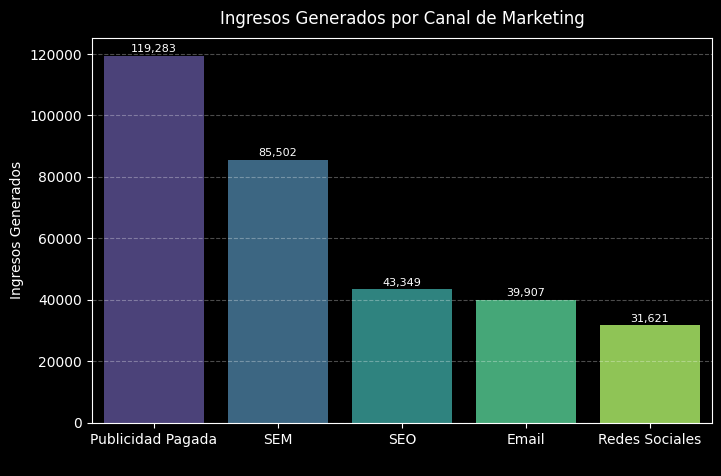

In [13]:
# datos a usar
ganancias_por_canal = data.groupby('Canal_Marketing')['Ingresos_Por_Canal'].sum().sort_values(ascending=False).reset_index()

# gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Canal_Marketing', y='Ingresos_Por_Canal', hue='Canal_Marketing', data=ganancias_por_canal, palette='viridis')
# Personalización el título y las etiquetas
plt.title('Ingresos Generados por Canal de Marketing', color='white', fontsize=12, pad=10)
plt.ylabel('Ingresos Generados', color='white', fontsize=10)

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='white', fontsize=8, 
                xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()

## Análisis de comportamiento y ubicación:

#### Comportamiento Online por Ubicación:

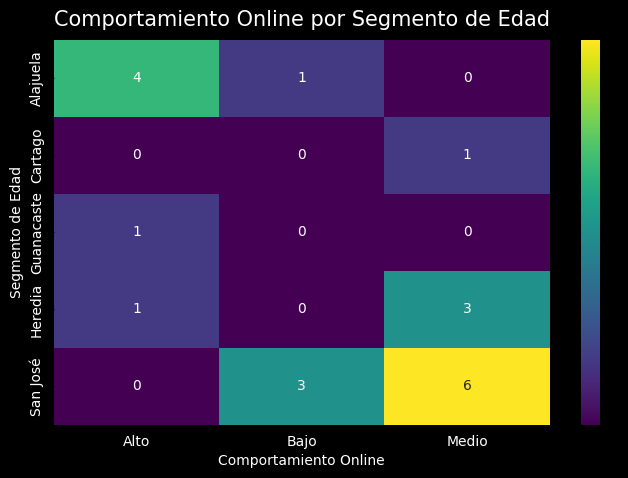

In [14]:
# Tabla cruzada con los datos a utilizad
comportamiento_por_ubicacion = pd.crosstab(data['Ubicación'], data['Comportamiento_Online'])

# Visualizar por medio heatmap 
plt.figure(figsize=(8, 5))
sns.heatmap(comportamiento_por_ubicacion, annot=True, fmt='d', cmap='viridis')
# título y tiquetas
plt.title('Comportamiento Online por Segmento de Edad', color='white', fontsize=15, pad=10)
plt.xlabel('Comportamiento Online', color='white', fontsize=10)
plt.ylabel('Segmento de Edad', color='white', fontsize=10)
plt.xticks(color='white')
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

# mostrar
plt.show()

#### Canal de marketing con más interacciones:

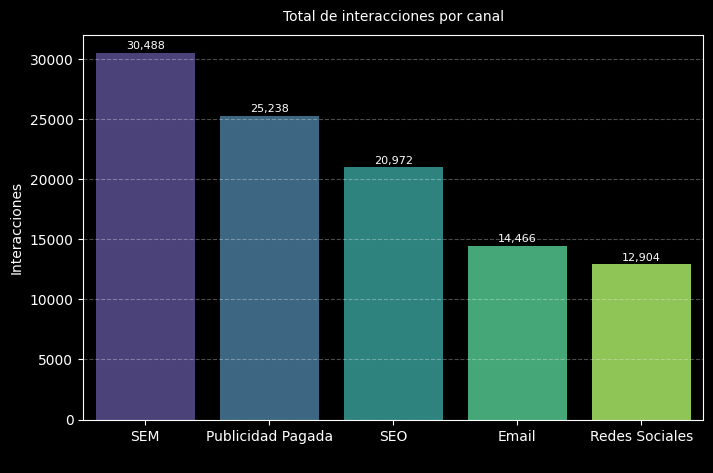

In [15]:
# selección de los datos
canal_mas_interacciones = data.groupby('Canal_Marketing')['Interacción_Total'].sum().sort_values(ascending=False).reset_index()

# gráfico de barras
plt.figure(figsize=(8, 5))
ax= sns.barplot(x='Canal_Marketing', y='Interacción_Total', hue='Canal_Marketing', data= canal_mas_interacciones, palette='viridis')
# título y etiquetas
plt.title('Total de interacciones por canal', fontsize= 10, pad=10, color='white')
plt.ylabel('Interacciones', color='white') 
plt.xticks(color='white')
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)
    
# anotaciones en las columnas  
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                color='white', fontsize=8,
                xytext=(0, 5), textcoords='offset points')
# Mostrar   
plt.show()

#### Tipo de contenido con más interacciones:

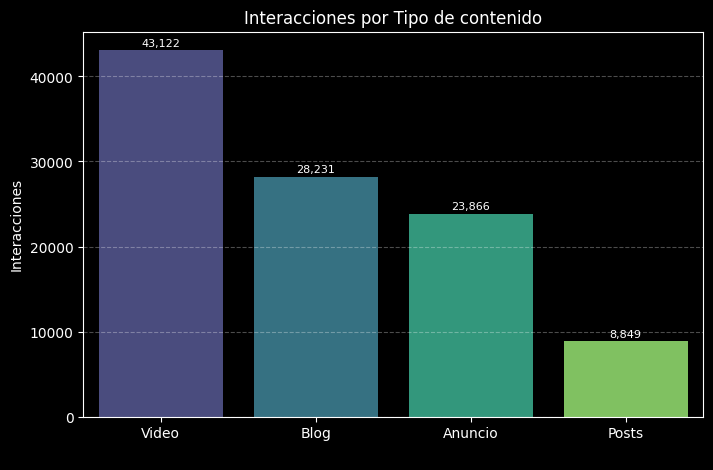

In [16]:
# seleccionar datos
tipo_contenido_interac = data.groupby('Tipo_Contenido')['Interacción_Total'].sum().sort_values(ascending=False).reset_index()
# grafico
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Tipo_Contenido', y= 'Interacción_Total', hue= 'Tipo_Contenido', data=tipo_contenido_interac, palette='viridis')
# titulo, etiquetas
plt.title('Interacciones por Tipo de contenido', color='white', )
plt.ylabel('Interacciones', color='white') 
plt.xticks(color='white')
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)
    
# anotaciones en las columnas
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                color='white', fontsize=8,
                xytext=(0, 5), textcoords='offset points')
# mostrar 
plt.show()

#### Encuestas por ubicación y puntuación de satisfacción con el producto

###### Escala del 1 al 5

In [17]:
encuestas_satisfaccion = data.groupby('Ubicación').agg({'Encuestas_Recibidas': 'sum', 'Puntuación_Satisfacción': 'mean'}).reset_index()
encuestas_satisfaccion

,Ubicación,Encuestas_Recibidas,Puntuación_Satisfacción
0,Alajuela,604,3.206000
1,Cartago,128,2.990000
2,Guanacaste,156,4.510000
3,Heredia,552,3.610000
4,San José,972,2.773333


#### Eficacia del tipo de contenido:

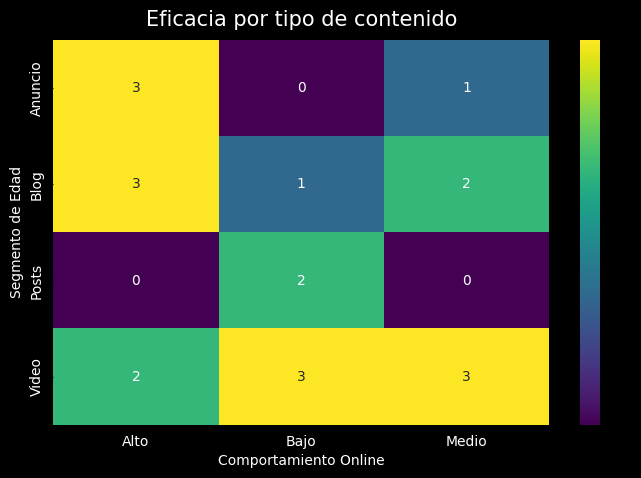

In [18]:
# seleccionar datos
eficacia_por_tipo = pd.crosstab(data['Tipo_Contenido'], data['Eficacia_Contenido'])
# heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(eficacia_por_tipo, annot=True, fmt='d', cmap='viridis')
# titulo, etiquetas
plt.title('Eficacia por tipo de contenido', color='white', fontsize=15, pad=10)
plt.xlabel('Comportamiento Online', color='white', fontsize=10)
plt.ylabel('Segmento de Edad', color='white', fontsize=10)
plt.xticks(color='white')
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

# mostrar
plt.show()

#### Desempeño de los competidores por ubicación:

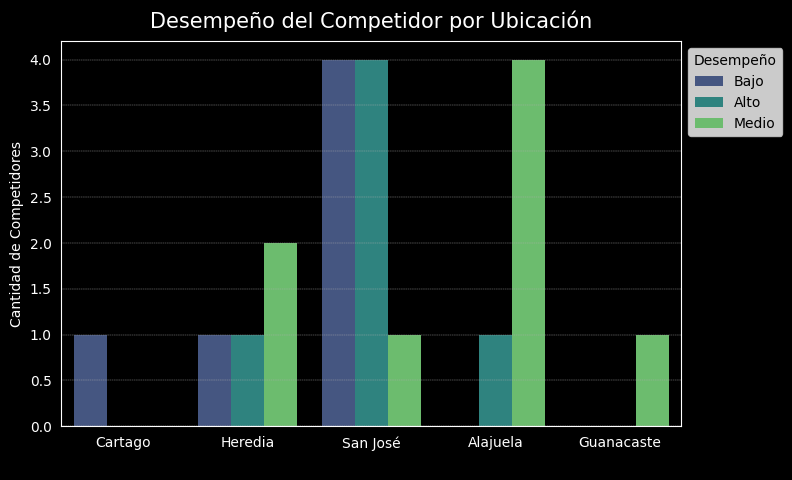

In [19]:
# datos
desempeño_competidor = data.groupby(['Ubicación', 'Desempeño_Competidor']).size().unstack(fill_value=0)
# grafico 
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Ubicación', hue='Desempeño_Competidor', palette='viridis')
#titulo, etiquetas, leyenda
plt.title('Desempeño del Competidor por Ubicación', fontsize=15, pad=10, color='white')
plt.ylabel('Cantidad de Competidores', color='white')
plt.legend(title='Desempeño', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(color='white')
plt.yticks(color='white')

# fondo
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='y', linestyle='--', linewidth='0.3')
ax = plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')


# mostrar
plt.show()

#### Lista de comentarios de mejoras provenientes de las entrevistas:

In [20]:
data['Comentarios_Mejoras'].value_counts()

Comentarios_Mejoras
Mejorar CTA en Email                5
Mejorar CTA en SEO                  5
Mejorar CTA en Publicidad Pagada    4
Mejorar CTA en SEM                  4
Mejorar CTA en Redes Sociales       2
Name: count, dtype: int64

## Análisis de ingresos y segmentación

#### Resumen general de las campañas (ROI, presupuesto, costo, ingreso, ganancia/pérdida):

In [21]:
# crear nueva columna 
data['Ganancia_Perdida'] = data['Ingreso_Generado'] - data['Costo_Camp']
# tabla resumen 
resumen_roi = data.groupby('Nombre_Camp').agg({
    'ROI': 'mean',
    'Presupuesto_Asignado': 'sum',
    'Costo_Camp': 'sum',
    'Ingreso_Generado': 'sum',
    'Ganancia_Perdida': 'sum'
}).sort_values(by='ROI', ascending=False)

resumen_roi

,ROI (%),Presupuesto_Asignado,Costo_Camp,Ingreso_Generado,Ganancia_Perdida
Nombre_Camp,,,,,
Love4U,574.482521,40329,8696,58653,49957
Madre_Amor,425.500484,8733,12388,65099,52711
Noche_Brujas,238.760029,30694,20565,69666,49101
Sale_sol,161.505721,41882,18091,47309,29218
Tipica_s,103.875724,6921,22112,45081,22969
Frescura_Ext,95.212108,14459,13743,26828,13085
FresQra,57.678664,23330,31008,48893,17885
1_fria,41.134972,13764,35437,50014,14577
Fiestas_Pat,39.054095,29758,35881,49894,14013


#### Ingresos por segmento de edad:

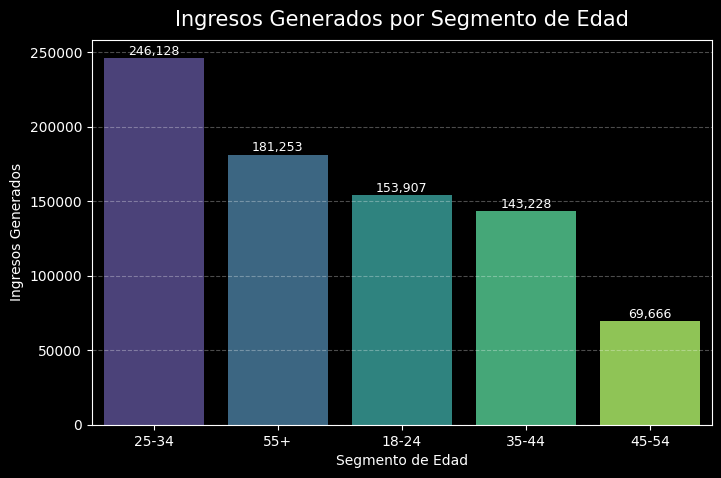

In [22]:
ingresos_por_edad = data.groupby('Segmento_Edad')['Ingreso_Generado'].sum().sort_values(ascending=False)
# Convert Series to DataFrame
ingresos_por_edad_df = ingresos_por_edad.reset_index()
ingresos_por_edad_df.columns = ['Segmento_Edad', 'Ingreso_Generado']
# barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Segmento_Edad', y='Ingreso_Generado', data=ingresos_por_edad_df, hue='Segmento_Edad', palette='viridis')
# titulo, etiquetas
plt.title('Ingresos Generados por Segmento de Edad', color='white', fontsize=15, pad=10)
plt.xlabel('Segmento de Edad', color='white', fontsize=10)
plt.ylabel('Ingresos Generados', color='white', fontsize=10)
plt.xticks(color='white', rotation=360)
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

# anotaciones
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='white', fontsize=9, 
                xytext=(0, 5), textcoords='offset points')
# mostrar
plt.show()

#### Comportamiento Online por segmentos de edad:

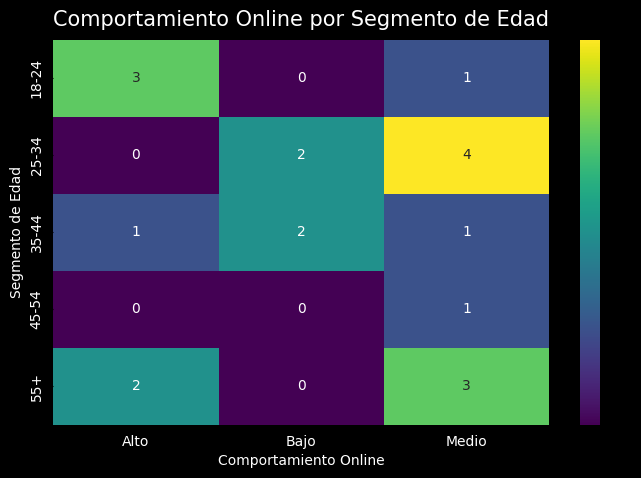

In [23]:
# datos
comportamiento_por_edad = pd.crosstab(data['Segmento_Edad'], data['Comportamiento_Online'])
# heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(comportamiento_por_edad, annot=True, fmt='d', cmap='viridis')
# titulo, etiquetas
plt.title('Comportamiento Online por Segmento de Edad', color='white', fontsize=15, pad=10)
plt.xlabel('Comportamiento Online', color='white', fontsize=10)
plt.ylabel('Segmento de Edad', color='white', fontsize=10)
plt.xticks(color='white')
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)
    
#mostrar
plt.show()

#### Ingresos generados por ubicación:

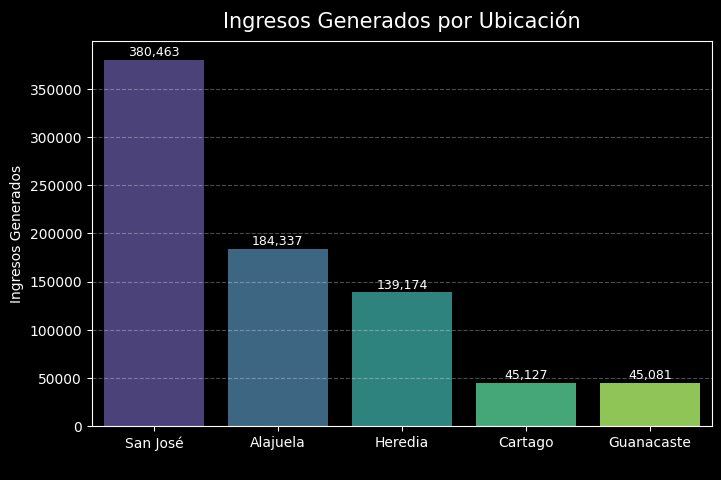

In [24]:
# datos
ingresos_por_ubicacion = data.groupby('Ubicación')['Ingreso_Generado'].sum().sort_values(ascending=False).reset_index()
# barras
plt.figure(figsize=(8, 5))
ax= sns.barplot(x='Ubicación', y='Ingreso_Generado', hue= 'Ubicación', data= ingresos_por_ubicacion, palette= 'viridis')
# titulo, etiquetas, cuadricula
plt.title('Ingresos Generados por Ubicación', color='white', fontsize=15, pad=10)
plt.ylabel('Ingresos Generados', color='white', fontsize=10)
plt.xticks(color='white', rotation=360)
plt.yticks(color='white')

# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

# anotaciones
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='white', fontsize=9, 
                xytext=(0, 5), textcoords='offset points')
    
# mostrar    
plt.show()

#### Impacto de la participación en el programa de lealtad:

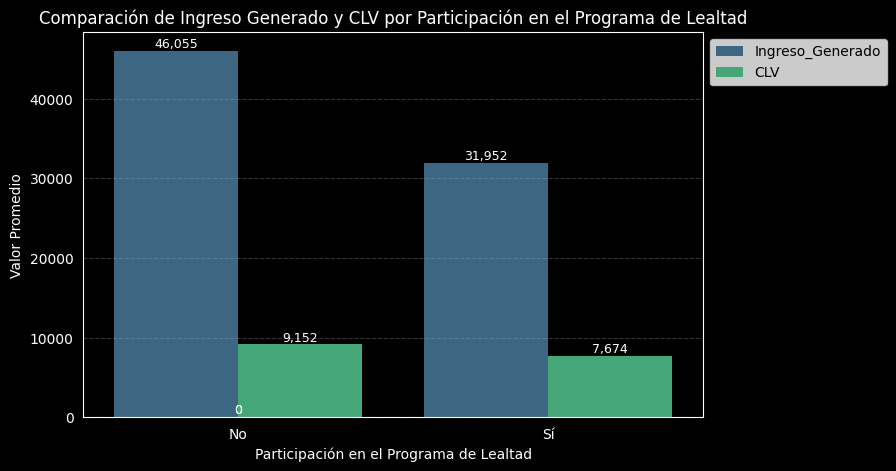

In [25]:
# Agrupar y calcular medias
grouped_data = data.groupby('Participación_Programa_Lealtad')[['Ingreso_Generado', 'CLV']].mean().reset_index()

# barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Participación_Programa_Lealtad', y='value', hue='variable',
            data=pd.melt(grouped_data, id_vars=['Participación_Programa_Lealtad']),  # Convertir a formato largo
    palette='viridis'
)
# titulo, etiqutas, leyenda
plt.title('Comparación de Ingreso Generado y CLV por Participación en el Programa de Lealtad', color='white')
plt.xlabel('Participación en el Programa de Lealtad', color='white')
plt.ylabel('Valor Promedio', color='white')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(color='white')
plt.yticks(color='white')

# fondo, cuadricula
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# bordes
ax = plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')

# anotaciones
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                color='white', fontsize=9, 
                xytext=(0, 5), textcoords='offset points')

# mostrar
plt.show()

#### Evolución temporal de registros, clics y compras: 

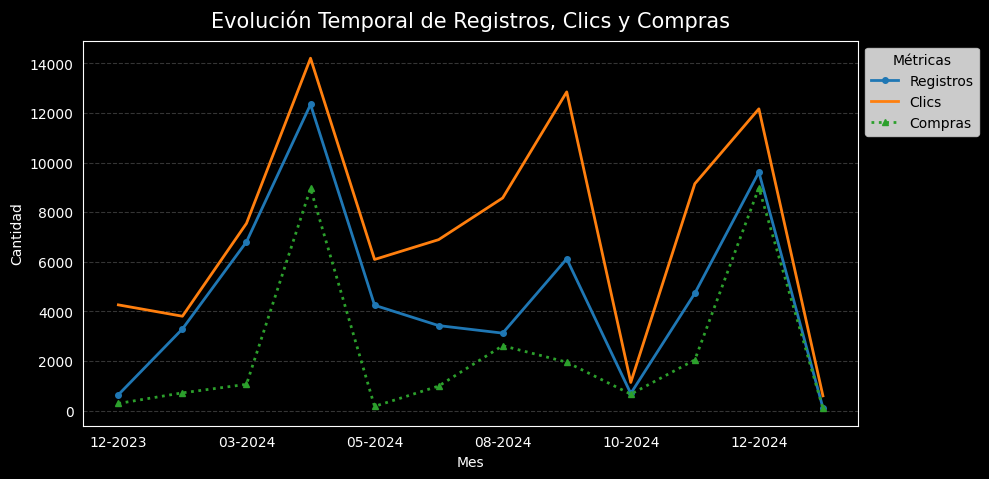

In [26]:
# Convertir fechas a datetime
data['Fecha_Inicio'] = pd.to_datetime(data['Fecha_Inicio'])
data['Fecha_Fin'] = pd.to_datetime(data['Fecha_Fin'])

# Agrupar por mes/año
data['Mes_Año'] = data['Fecha_Fin'].dt.to_period('M')

# Agrupar y sumar los datos
grouped_data = data.groupby('Mes_Año')[['Registros', 'Clics', 'Compras']].sum()

# Convertir el índice (Mes_Año) a cadenas de texto con formato "MM-YYYY"
grouped_data.index = grouped_data.index.strftime('%m-%Y')

# Graficar con estilos de línea personalizados
ax = grouped_data.plot(
    figsize=(10, 5),
    style={
        'Registros': 'o-',  # Línea con círculos en cada punto
        'Clics': '-',     # Línea normal
        'Compras': '^:'     # Línea con triángulos y puntos
    },
    markersize=4,           # Tamaño de los marcadores
    linewidth=2             # Grosor de las líneas
)

# titulo, etiquetas, cuadricula, fondo
plt.title('Evolución Temporal de Registros, Clics y Compras', fontsize=15, pad=10, color='white')
plt.ylabel('Cantidad', color='white')
plt.xlabel('Mes', color='white')
plt.xticks(color='white') 
plt.yticks(color='white')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# ajuste de leyenda
plt.legend( title='Métricas', bbox_to_anchor=(1, 1), loc='upper left', frameon=True, title_fontsize=10,
    fontsize=10, labelcolor='black'    
)

# bordes
ax=plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')
    
# Mostrar el gráfico
plt.show()

## 🧩 Análisis de correlaciones y patrones

#### Correlación entre variables clave (Interacción total, ROI, Compras, CLV):

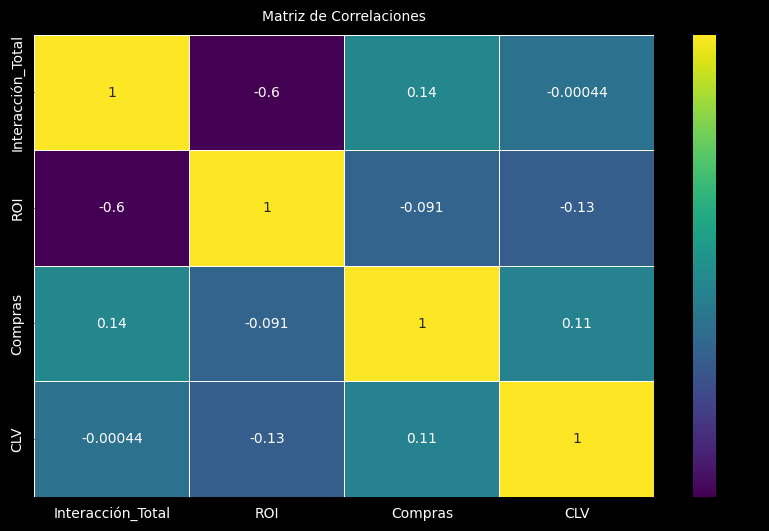

In [27]:
# Calcular y visualizar correlaciones
correlaciones = data[['Interacción_Total', 'ROI', 'Compras', 'CLV']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap='viridis', linewidths=0.5)
#titulo, etiquetas
plt.title('Matriz de Correlaciones', fontsize=10, pad=10, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
# Llamar a la función para personalizar el gráfico
personalizar_grafico(ax)

plt.show()

#### Grupos de clientes con patrones similares:

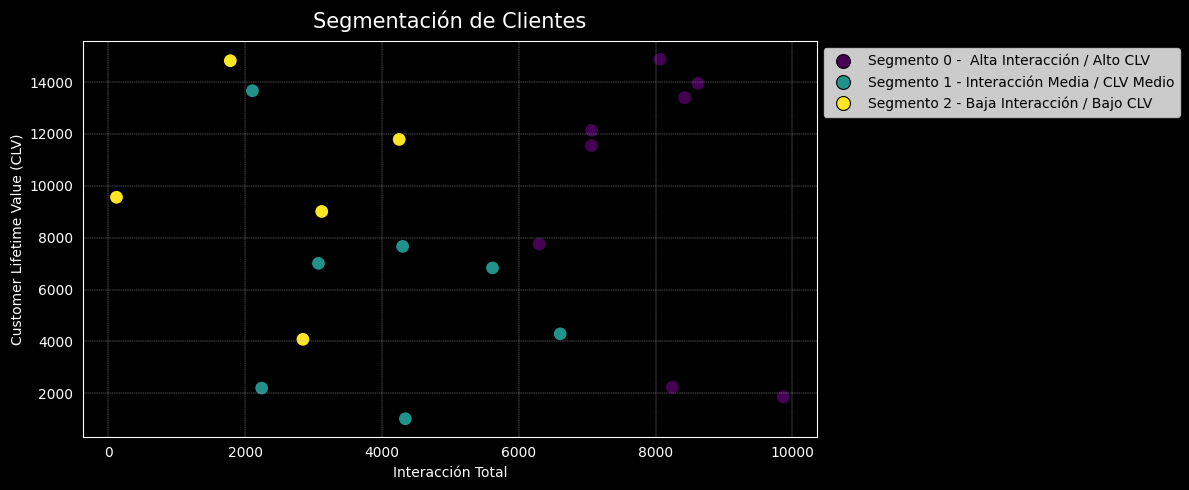

In [28]:
# Copia del DataFrame para no modificar el original
data_cluster = data.copy()
# codificador de etiquetas, no genera un orden específico
encoder_compor = LabelEncoder()
data_cluster['Comportamiento_Online'] = encoder_compor.fit_transform(data_cluster['Comportamiento_Online'])

# Selección de variables relevantes
X = data_cluster[['Comportamiento_Online', 'Interacción_Total', 'CLV']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Segmento'] = kmeans.fit_predict(X_scaled)

# Ajustar tamaño de los puntos
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data_cluster['Interacción_Total'], y=data_cluster['CLV'], hue=data_cluster['Segmento'], palette='viridis',  
    s=100,  # Tamaño fijo para todos los puntos
    edgecolor='k'
)

# Mejorar leyenda
legend_labels = {
    0: 'Segmento 0 -  Alta Interacción / Alto CLV',
    1: 'Segmento 1 - Interacción Media / CLV Medio',
    2: 'Segmento 2 - Baja Interacción / Bajo CLV'
}

# Asegurar que la leyenda incluya todos los segmentos
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles, 
    [legend_labels[int(label)] for label in sorted(data_cluster['Segmento'].unique())], 
    fontsize=10,
    bbox_to_anchor=(1, 1), loc='upper left'
)

# título, etiquetas
plt.title('Segmentación de Clientes', color='white', fontsize=15, pad=10)
plt.xlabel('Interacción Total', color='white')
plt.ylabel('Customer Lifetime Value (CLV)', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

# fondo, cuadricula
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='both', linestyle='--', linewidth=0.3)

# bordes
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('white')

plt.tight_layout()
plt.show()

## **4. Modelos predictivos y machine learning**

### 4.1 Preparación para los modelos:

Categorizar los canales de marketing:

In [29]:
#codificador de categorias
label_encoder_canal = LabelEncoder()
# Aplicar la codificación y agregar nuevas columnas
data['Canales_codificados'] = label_encoder_canal.fit_transform(data['Canal_Marketing'])

## Modelos de regresión

#### Modelo de regresión lineal:

In [30]:
# valores X, y para el modelo
X = data[['Costo_Camp', 'Ingreso_Generado', 'Canales_codificados']]
y = data['ROI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 4355.840103951599
Coeficiente de determinación (R²): 0.8534326389187777


- Coeficiente de determinación aceptable pero error medio muy alto

#### Modelo de regresión lineal (con transformación logarítmica del ROI)

In [31]:
# Aplicar log(ROI + C), donde C es una constante para manejar valores negativos
C = 100  
data['ROI_transformado'] = np.log(data['ROI'] + C)

# Usar ROI_transformado como variable dependiente
X3 = data[['Costo_Camp', 'Ingreso_Generado', 'Canales_codificados']]
y3 = data['ROI_transformado']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X3_train, y3_train)

# Realizar predicciones
y3_pred = model.predict(X3_test)

# Evaluar el modelo
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 0.03392781290295445
Coeficiente de determinación (R²): 0.9137933948249652


- El ajuste logaritmico de los valores del ROI lograron generar un mejor ajuste, sin embargo, para determinar si el modelo es optimo se debe realizar una validacion cruzada para verificar el ajuste de los mismos sea general en varias partes del modelo.

#### Validación cruzada para regresión lineal

In [32]:
# Configurar validación cruzada con 5 folds
scores = cross_val_score(model, X3, y3, cv=5, scoring='r2')

# Resultados
print("Resultados de R² en cada fold:", scores)
print("Media del R²:", scores.mean())
print("Desviación estándar del R²:", scores.std())

# Predicciones usando validación cruzada
y_pred_cv = cross_val_predict(model, X3, y3, cv=5)

# Calcular el error para las predicciones de validación cruzada
mse_cv = mean_squared_error(y3, y_pred_cv)

print("\nError cuadrático medio (MSE) en validación cruzada:", mse_cv)

Resultados de R² en cada fold: [0.92254012 0.77173232 0.93513254 0.92222141 0.60114746]
Media del R²: 0.83055477089448
Desviación estándar del R²: 0.1295286714548597

Error cuadrático medio (MSE) en validación cruzada: 0.03953501043931993


- Por medio de la validación cruzada se determina que en realidad el modelo puede explicar un 83% de las predicciones, con variaciones grandes en algunos folds

## Modelo de regresión Polinómica

In [33]:
# Preparar los datos para el modelo
X = data[['Costo_Camp', 'Ingreso_Generado', 'Canales_codificados']]
y = data['ROI_transformado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelo de regresión polinómica
poly = PolynomialFeatures(degree=2)  # Grado del polinomio
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Evaluar el modelo de regresión polinómica
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Resultados regresión polinómica:")
print("MSE:", mse_poly)
print("R²:", r2_poly)

Resultados regresión polinómica:
MSE: 0.0031024186435471774
R²: 0.9921171170137922


- Bajo el modelo de regresión polinómica parece que los datos se ajustan casi a la perfección, sin embargo, podría ser causa de un sobre ajuste en el modelo.

##### Pipeline con regresión polinómica + regularización Ridge + validación cruzada

In [34]:
# Preparacion de los datos
X = data[['Costo_Camp', 'Ingreso_Generado', 'Canales_codificados']]
y = data['ROI_transformado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline con escalado, transformación polinómica y Ridge
pipeline = Pipeline([
    ('scaler', StandardScaler()),                    # Estandarización para normalizar los datos
    ('poly', PolynomialFeatures(degree=2)),         # Generar términos polinómicos de grado 2
    ('ridge', Ridge())                              # Modelo de regresión Ridge para regularización
])

# Definir la grilla de hiperparámetros para Ridge
param_grid = {'ridge__alpha': np.logspace(-3, 0.01, 2, 3, 20)}  # Alpha controla la fuerza de la regularización

# Búsqueda de hiperparámetros con validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2')

# Entrenar el modelo con la mejor combinación de hiperparámetros
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas para evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print("Mejor valor de alpha para Ridge:", grid_search.best_params_)
print("MSE en el conjunto de prueba:", mse)
print("R² en el conjunto de prueba:", r2)

# Resultados adicionales para validación cruzada
cv_r2_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
cv_mse_scores = -cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("Resultados validación cruzada:")
print("R² en cada fold:", cv_r2_scores)
print("Media del R²:", np.mean(cv_r2_scores))
print("Desviación estándar del R²:", np.std(cv_r2_scores))
print("MSE en cada fold:", cv_mse_scores)
print("Media del MSE:", np.mean(cv_mse_scores))

Mejor valor de alpha para Ridge: {'ridge__alpha': np.float64(0.000125)}
MSE en el conjunto de prueba: 0.0031022609271608506
R² en el conjunto de prueba: 0.9921175177526871
Resultados validación cruzada:
R² en cada fold: [0.99211752 0.99716724 0.93516407 0.95507071 0.94070645]
Media del R²: 0.964045197892432
Desviación estándar del R²: 0.02586303610752138
MSE en cada fold: [0.00310226 0.00263739 0.01082112 0.00991782 0.02384152]
Media del MSE: 0.010064020503738533


- Dado a que el resultado parece ser bueno, hay que profundizar para analizar si el modelo realmente tiene un buen rendimiento o tiene alguna deficiencia que pueda dañar las predicciones

#### Gráficos de residuos

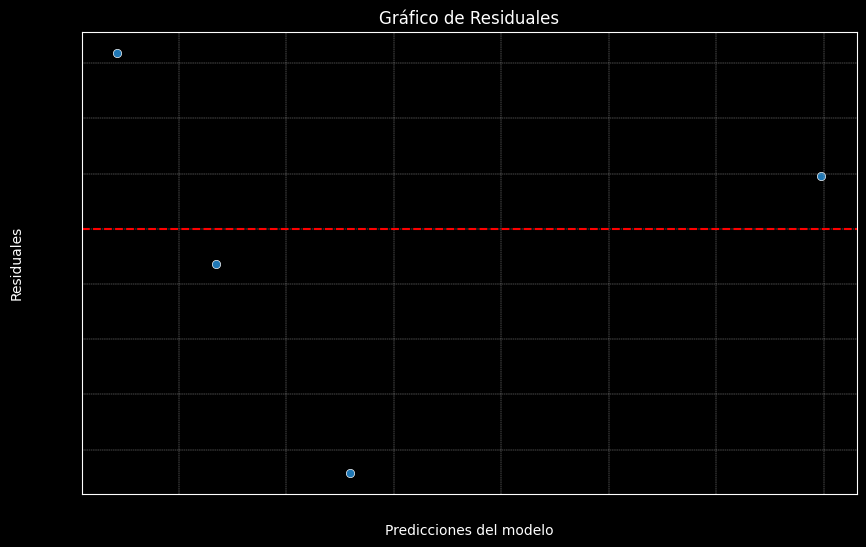

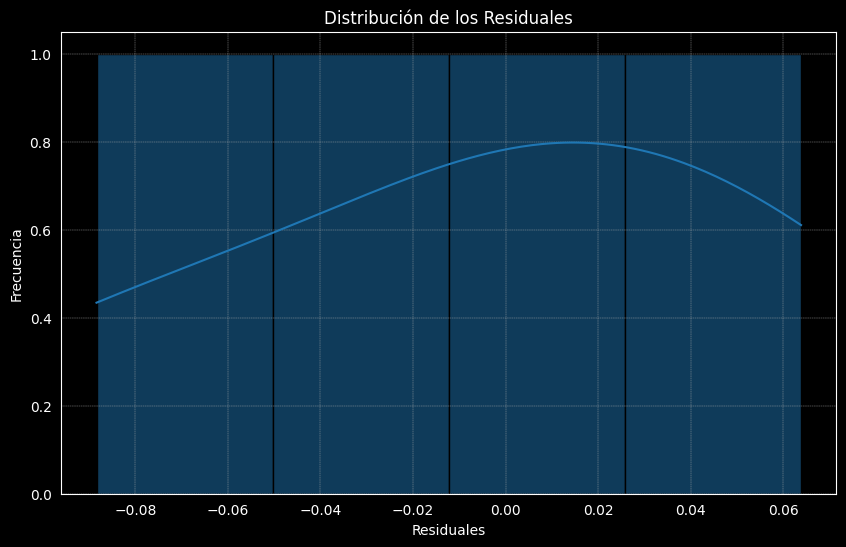

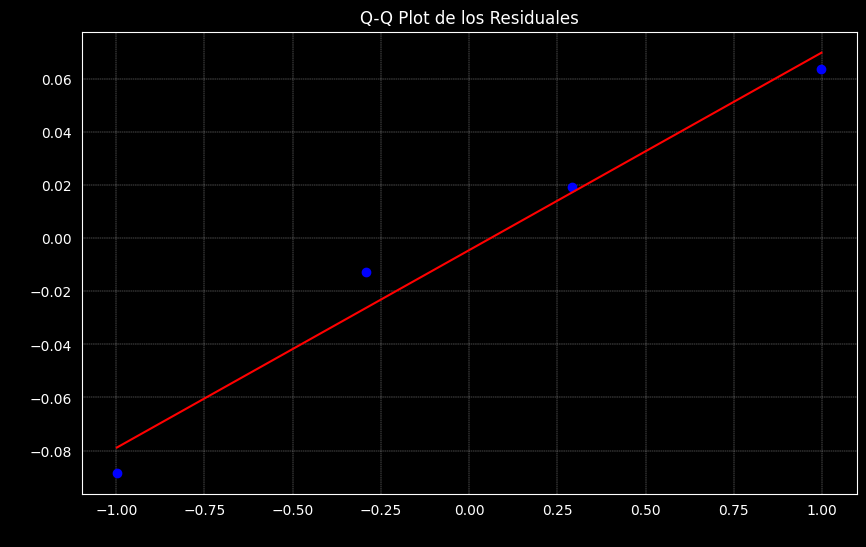

Media de los residuales: -0.004473323724971667
Desviación estándar de los residuales: 0.05551801781415161


In [35]:
# Calcular los residuales
residuos = y_test - y_pred

# Gráfico de residuales vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones del modelo', color='white')
plt.ylabel('Residuales', color='white')
plt.title('Gráfico de Residuales', color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='both', linestyle='--', linewidth=0.3)
ax =plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')

plt.show()

# Histograma de los residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=4)
plt.xlabel('Residuales', color='white')
plt.ylabel('Frecuencia', color='white')
plt.title('Distribución de los Residuales', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(axis='both', linestyle='--', linewidth=0.3)
ax =plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')
plt.show()

# Q-Q Plot para verificar normalidad
plt.figure(figsize=(10, 6))
probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuales', color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='both', linestyle='--', linewidth=0.3)
ax =plt.gca()
for spines in ax.spines.values():
    spines.set_color('white')
plt.show()

# Métricas adicionales
print("Media de los residuales:", np.mean(residuos))
print("Desviación estándar de los residuales:", np.std(residuos))

#### Prueba de normalidad de los residuos

In [36]:
# Prueba de Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = shapiro(residuos)

# Prueba de Kolmogorov-Smirnov (comparando con normal estándar)
ks_test_stat, ks_p_value = kstest(residuos, 'norm', args=(residuos.mean(), residuos.std()))

# Resultados
print("Resultados de la prueba de normalidad:")
print(f"Shapiro-Wilk test: estadístico = {shapiro_test_stat}, p-valor = {shapiro_p_value}")
print(f"Kolmogorov-Smirnov test: estadístico = {ks_test_stat}, p-valor = {ks_p_value}")

# Interpretación
def interpretar_prueba(p_valor, nombre_prueba):
    if p_valor > 0.05:
        print(f"{nombre_prueba}: No se rechaza la hipótesis nula. Los residuales parecen seguir una distribución normal.")
    else:
        print(f"{nombre_prueba}: Se rechaza la hipótesis nula. Los residuales parecen NO seguir una distribución normal.")

interpretar_prueba(shapiro_p_value, "Shapiro-Wilk")
interpretar_prueba(ks_p_value, "Kolmogorov-Smirnov")

Resultados de la prueba de normalidad:
Shapiro-Wilk test: estadístico = 0.9792932327795808, p-valor = 0.8978606893955785
Kolmogorov-Smirnov test: estadístico = 0.1996071355236596, p-valor = 0.9881025828779938
Shapiro-Wilk: No se rechaza la hipótesis nula. Los residuales parecen seguir una distribución normal.
Kolmogorov-Smirnov: No se rechaza la hipótesis nula. Los residuales parecen seguir una distribución normal.


#### Cálculo del VIF para analizar multicolinealidad

In [37]:
# definir el calculo VIF
def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

# Calcular el VIF para tus variables predictoras
vif_resultados = calcular_vif(X_train)
print(vif_resultados)

# Interpretación de los resultados
for index, row in vif_resultados.iterrows():
    if row['VIF'] > 5:
        print(f"La variable '{row['Variable']}' tiene un VIF de {row['VIF']:.2f}, lo que indica (POSIBLE Multicolinealidad).")
    else:
        print(f"La variable '{row['Variable']}' tiene un VIF de {row['VIF']:.2f}, (DENTRO del rango ACEPTABLE).")

              Variable       VIF
0           Costo_Camp  3.048300
1     Ingreso_Generado  3.868045
2  Canales_codificados  2.726643
La variable 'Costo_Camp' tiene un VIF de 3.05, (DENTRO del rango ACEPTABLE).
La variable 'Ingreso_Generado' tiene un VIF de 3.87, (DENTRO del rango ACEPTABLE).
La variable 'Canales_codificados' tiene un VIF de 2.73, (DENTRO del rango ACEPTABLE).


## 4.2 Modelos avanzados

#### Modelo Random Forest

In [38]:
# variables para el modelo
X = data[['Costo_Camp', 'Ingreso_Generado', 'Canales_codificados']]
y = data['ROI_transformado']


# Definir el modelo base
rf_model = RandomForestRegressor(random_state=42)

# Definir la distribución de hiperparámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2']
}

# Usar RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar el modelo con RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf_model = random_search.best_estimator_

# Evaluar el modelo de Random Forest optimizado
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Resultados
print("\nResultados Random Forest optimizado:")
print("Mejores hiperparámetros:", random_search.best_params_)
print("MSE:", mse_rf)
print("R²:", r2_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Resultados Random Forest optimizado:
Mejores hiperparámetros: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
MSE: 0.10445388847318596
R²: 0.7345948838977201


#### Modelo XGBoost

In [39]:
# Definir el modelo
xgb_model = XGBRegressor(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE con XGBoost:", mse_xgb)
print("R² con XGBoost:", r2_xgb)

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
MSE con XGBoost: 0.10248573635031875
R² con XGBoost: 0.7395957282924275


### Mejora en el Modelo XGBoost

Plantemiento del modelo XGBoost una mayor cantidad de hiperparámetros

###### *nota:  El siguiente código exige tiempo y recursos del procesador debido a la gran cantidad de hiperámetros de ajuste que evalúa de forma simultanea (tiempo promedio de ejecución 40 minutos)

<div style="background-color:rgba(19, 2, 2, 0.47); padding: 10px; border: 1px solid #ccc;">
    <h3 style="cursor: pointer;" ondblclick="toggleCode()">Haz doble clic para mostrar código</h3>
    <div id="codeCell" style="display: none;">
        <pre><code>
# Aquí va tu código oculto
print(
    
"#Definir el modelo
xgb_model = XGBRegressor(random_state=42)

#Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],  # Controla la poda del árbol
    'reg_alpha': [0, 0.1, 0.5],  # Regularización L1
    'reg_lambda': [0, 0.1, 0.5]  # Regularización L2
}

#Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=5,  # Validación cruzada con 5 folds
    scoring='r2',  # Métrica de evaluación
    n_jobs=-1  # Usar todos los núcleos del procesador
)

#Ajustar el modelo (sin early_stopping_rounds en GridSearchCV)
grid_search.fit(X_train, y_train)

#Mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

#Evaluar el mejor modelo
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE con XGBoost ajustado:", mse_xgb)
print("R² con XGBoost ajustado:", r2_xgb)")
        </code></pre>
    </div>
</div>

## Resumen de los Modelos Predictivos

#### **Regresión Lineal:**

MSE: 4355.84

R²: 0.85

- El modelo lineal básico explicó el 85% de la variabilidad del ROI, pero con un error cuadrático medio alto, lo que indica que las relaciones podrían no ser estrictamente lineales.


#### **Regresión Lineal con Transformación Logarítmica:**

MSE: 0.0339

R²: 0.91

**Validación Cruzada:**

Media R²: 0.83

Desviación estándar: 0.13

Media del MSE: 0.0395

- La transformación logarítmica mejoró significativamente la precisión del modelo, pero la alta desviación estándar en la validación cruzada sugiere que el desempeño varía entre subconjuntos de datos.


#### **Regresión Polinómica con Regularización Ridge:**

Mejor Alpha: 0.000125

MSE (prueba): 0.0031

R² (prueba): 0.99

**Validación Cruzada:**

Media R²: 0.96

Desviación estándar: 0.025

Media MSE: 0.0101

- El modelo polinómico ajustado con Ridge alcanzó un desempeño excelente, capturando el 99% de la varianza. Los gráficos de residuos y las pruebas de normalidad confirmaron que los residuos seguían una distribución normal. Además, los valores de VIF indicaron que no había problemas graves de multicolinealidad.

#### **Random Forest (Optimizado con GridSearchCV):**

Mejores hiperparámetros:

n_estimators: 400

max_depth: 20

max_features: 'log2'

MSE: 0.1044

R²: 0.73

- Aunque Random Forest capturó patrones complejos, su R² fue más bajo que los modelos lineales ajustados, lo que podría indicar que la relación entre variables tiene ciertas interacciones difíciles de captar incluso con múltiples árboles.

#### **XGBoost (Optimizado con GridSearchCV):**

Mejores hiperparámetros:

learning_rate: 0.01

max_depth: 5

n_estimators: 200

MSE: 0.1025

R²: 0.74

- XGBoost superó a Random Forest y logró un equilibrio entre precisión y generalización. Su capacidad para ajustar pesos de manera iterativa le permitió adaptarse mejor a los datos, sin caer en un sobreajuste extremo.

<h1> 4.3 Predicciones con el modelo de regresión polinómica con regularización Ridge <h1>

#### Crear una función que permita entrenar y transformar los datos para luego generar predicciones

In [40]:
# Función para hacer predicciones
def predecir_roi(costo, ingreso, canal):
    # Crear un DataFrame con los valores de entrada y nombres de columnas
    datos_entrada = pd.DataFrame({
        'Costo_Camp': [costo],
        'Ingreso_Generado': [ingreso],
        'Canales_codificados': [canal]
    })
    
    # Escalar y transformar los datos usando el pipeline del modelo
    datos_transformados = best_model.named_steps['scaler'].transform(datos_entrada)
    datos_polinomicos = best_model.named_steps['poly'].transform(datos_transformados)
    
    # Predecir el ROI transformado
    roi_transformado_predicho = best_model.named_steps['ridge'].predict(datos_polinomicos)
    
    # invertir la transformacion logaritmica para obtener el ROI original
    roi_predicho = np.exp(roi_transformado_predicho)  # Cambia según la transformación
    
    return roi_predicho[0]  # Devolver el valor predicho

#### Codificación de los canales de marketing a tener en cuenta:

0 = Email

1 = Publicidad Pagada

2 = Redes Sociales

3 = SEM 

4 = SEO

Plantemiento para la realización de predicciones

In [41]:
# Valores de entrada
costo = 120000
ingreso = 58000
canal = 4

# Hacer la predicción
roi_predicho = predecir_roi(costo, ingreso, canal)

# Mostrar el resultado
print(f"El ROI predicho para los valores ingresados es: {roi_predicho:.4f}")

El ROI predicho para los valores ingresados es: 7537.2373


 ## **5. Conclusiones**

- **Resumen de hallazgos clave:** 

**1. Análisis de Campañas de Marketing**

- Campañas con mayores tasas de retorno: Las campañas "Love4U" y "Madre_Amor" destacan por generar los mayores ROI, especialmente en fechas clave como San Valentín y el Día de la Madre. Esto sugiere que aprovechar eventos especiales potencia los resultados.

- Campañas con peores tasas de retorno: (*Además de las razones planteadas en el informe 12-3*). Se puede agregar que: las campañas con peor ROI, como "Noche_brindis" y "Fest_Luz", ocurrieron en diciembre, lo que podría indicar saturación del mercado o estrategias no optimizadas.

- Presupuestos excedidos: La mayoría de las campañas sobrepasaron su presupuesto, lo que indica la necesidad de optimizar los costos sin comprometer resultados.

- Resumen general: 13 campañas obtuvieron ganancias, mientras que 7 generaron pérdidas, lo que refuerza la importancia de evaluar la rentabilidad individual.

**2. Canales de Marketing y Contenido**

- Ganancias por canal: Publicidad Pagada y SEM son los canales más rentables, lo que indica que la inversión en estos canales puede ser clave.

- Interacciones por canal: SEM lidera las interacciones, seguido por Publicidad Pagada y SEO, confirmando la efectividad de las estrategias de búsqueda pagada.

- Eficacia del contenido: Videos, blogs y anuncios son los formatos más efectivos, mientras que los posts generan menos interacciones.

- Comentarios de mejora: Las encuestas sugieren mejorar los CTA en Email y optimizar la estrategia SEO para incrementar las conversiones.

**3. Comportamiento y Satisfacción por Ubicación**

- Comportamiento online: Alajuela tiene la mayor actividad online, mientras que Cartago y Guanacaste muestran bajos niveles de interacción.

- Encuestas y satisfacción: Guanacaste tiene la puntuación más alta (4.51), mientras que San José presenta la más baja (2.77), lo que indica necesidades de mejora en la capital.

- Competencia por ubicación: San José tiene la mayor cantidad de competidores con un alto desempeño, lo que puede aumentar la dificultad de captar mercado.

**4. Segmentación y Programa de Lealtad**

- Ingresos por segmento de edad: Los grupos de 25-34 y mayores de 55 generan los ingresos más altos, lo que permite enfocar estrategias específicas para estos segmentos.

- Comportamiento online por edad: Los usuarios de 18-24 tienen la mayor actividad online, representando un público clave para formatos digitales.

- Impacto de la lealtad: Los clientes leales generan un CLV menor pero contribuyen con ingresos significativos, lo que resalta la importancia de fidelizar.

**5. Tendencias Temporales y Correlaciones**

- Picos de actividad: Marzo, septiembre y diciembre concentran la mayor cantidad de registros, clics y compras, lo que indica oportunidades para reforzar las campañas en estos meses.

- Correlaciones: No se encontraron correlaciones fuertes entre Interacción total, ROI, Compras y CLV, lo que sugiere que múltiples factores influyen en el éxito de una estrategia.

#### **Evaluación de modelos predictivos:** 

- Regresión Polinómica con Ridge fue el modelo más preciso: Explicó el 99% de la varianza del ROI con residuos bien distribuidos y valores de VIF aceptables.

- Transformar los datos mejoró significativamente el rendimiento: La transformación logarítmica fue esencial para mejorar los modelos lineales y estabilizar los residuos.

- Los modelos basados en árboles (Random Forest y XGBoost) tuvieron buen desempeño, pero no superaron la regresión polinómica, esto sugiere que las relaciones no son tan caóticas, sino que siguen patrones más estructurados que un modelo polinómico pudo capturar.

- Validación cruzada reveló cierta inestabilidad en algunos modelos: La regresión logarítmica mostró una alta variabilidad entre folds, lo que indica que algunos segmentos de datos podrían comportarse de manera diferente.

## **6. Recomendaciones**

#### Campañas:
- Optimizar la asignación de presupuesto: Es clave equilibrar la inversión para no exceder costos sin comprometer la eficacia de las campañas.

- Enfocar esfuerzos en canales y formatos efectivos: Reforzar la inversión en SEM y Publicidad Pagada, priorizando videos y blogs como formatos de contenido principales.

- Personalizar estrategias por ubicación y edad: Adaptar las campañas según el comportamiento online y las preferencias de cada grupo demográfico para maximizar el impacto.

- Fortalecer el programa de lealtad: Aunque los clientes leales tienen un CLV menor, su aportación a los ingresos justifica la inversión en mantener relaciones duraderas.

- Planificar según las tendencias temporales: Aprovechar los meses de mayor actividad para intensificar las campañas y capturar la atención del mercado.

#### Modelos de predicción:

- Análisis de Interacciones: Probar modelos de regresión con términos de interacción podría mejorar aún más la precisión, especialmente en las campañas con comportamientos atípicos.

- Feature Engineering: Crear nuevas variables basadas en combinaciones de métricas (como ratio de clics por canal o duración de campañas) podría enriquecer los modelos.

- Técnicas de Ensemble: Combinar los mejores modelos (por ejemplo, con un stacking ensemble) podría aprovechar las fortalezas de cada algoritmo y reducir errores.

- La regresión polinómica con regularización Ridge es el modelo más adecuado **para este conjunto de datos**, seguido de XGBoost como alternativa. En caso de incluirse nuevos datos al dataset se debe monitoriar los efectos en los modelos y verificar su desempeño predictivo.

## Si desea conocer el informe final o aportar algún comentario te dejo mi correo: braulioherre98@gmail.com 

## Elaborado por:
**Braulio Herrera González**

Data Analyst / Business Management

Fecha: 12/03/2025